# Using SSTS to search Patterns

In [27]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\tools")

from SSTS.backend.gotstools import connotation, symbolic_search
import SSTS.backend.gotstools as gt

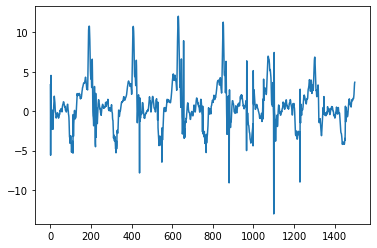

In [65]:
s = np.loadtxt("Data/StepAcc.txt", delimiter=",")
s = s[1000:2500, 3]
plt.plot(s)

In [66]:
s_pp = gt.pre_processing([s], 'LP 2 S 50')

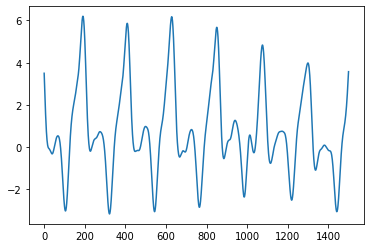

In [67]:
plt.plot(s_pp)

In [77]:
s_c = gt.connotation([s_pp], "A 0.6 D1 0.05")
string_s = s_c[0]

In [78]:
#find places where the signal is increasing with low amplitudes
matches = gt.symbolic_search(s_c[0], s_c[1], "(0p)+")

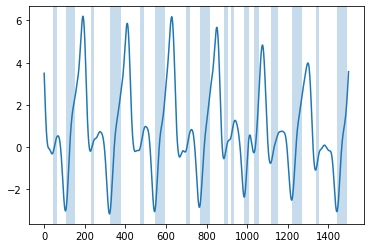

In [79]:
plt.plot(s_pp)
for match in matches:
    plt.axvspan(match[0], match[1], alpha=0.25)

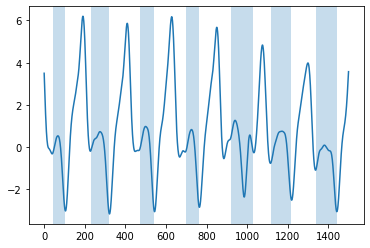

In [81]:
#find places where the signal has peaks in a low amplitude increasing with low amplitudes
matches = gt.symbolic_search(s_c[0], s_c[1], "(0p)+(0z)+(0n)+")
plt.plot(s_pp)
for match in matches:
    plt.axvspan(match[0], match[1], alpha=0.25)